In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Electric_Production.csv')

In [ ]:
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])
df=df.set_index('DATE')

In [ ]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'IPG2211A2N')

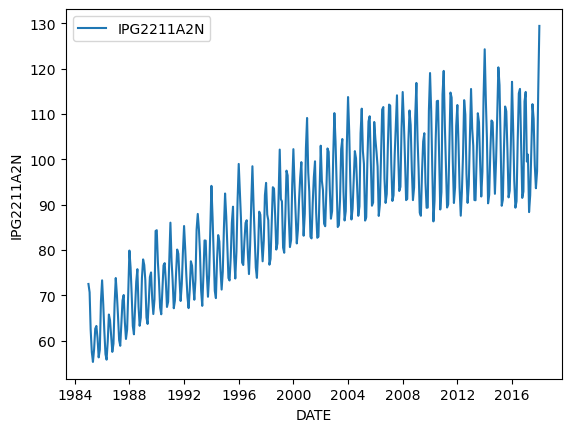

In [ ]:
sns.lineplot(df)
plt.ylabel('IPG2211A2N')

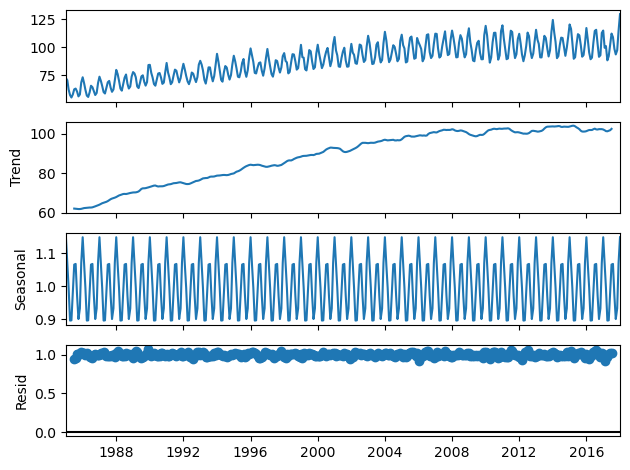

In [ ]:
result=seasonal_decompose(df[['IPG2211A2N']],model='multiplicative')
result.plot()
plt.show()

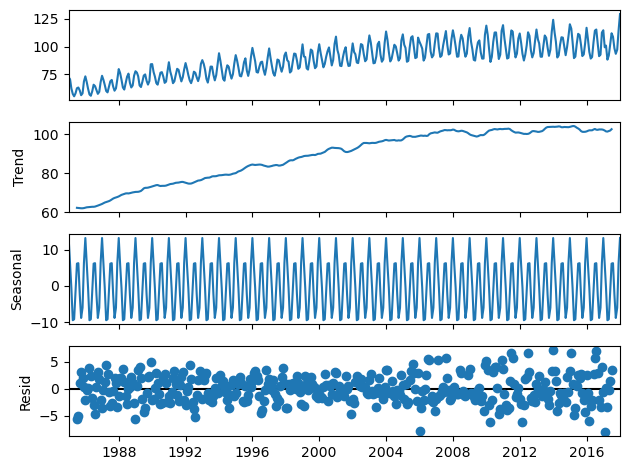

In [ ]:
result=seasonal_decompose(df[['IPG2211A2N']],model='additive')
result.plot()
plt.show()

In [ ]:
pip install pymannkendall

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pymannkendall as mk
mk.original_test(df['IPG2211A2N'])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=19.125339232804578, Tau=0.6427499173091112, s=50524.0, var_s=6978466.0, slope=0.11486610139860137, intercept=67.03601192307693)

In [ ]:
train_df=df[:int(df.shape[0]*0.7)]
test_df=df[int(df.shape[0]*0.7):]

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing
model_triple = ExponentialSmoothing(train_df, seasonal_periods=12, trend='add', seasonal='add')
model_triple_fit =model_triple.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast_triple= model_triple_fit.forecast(120)
print(forecast_triple)

2008-02-01    109.875492
2008-03-01    102.218329
2008-04-01     92.951407
2008-05-01     94.533240
2008-06-01    103.490456
                 ...    
2017-09-01    116.297379
2017-10-01    109.190245
2017-11-01    111.197022
2017-12-01    125.175611
2018-01-01    131.934824
Freq: MS, Length: 120, dtype: float64


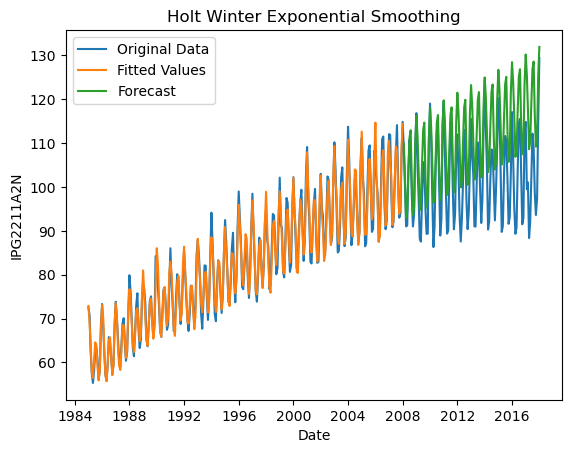

In [ ]:
plt.plot(df, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Date')
plt.ylabel('IPG2211A2N')
plt.title('Holt Winter Exponential Smoothing')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
mape_train = mean_absolute_percentage_error(train_df['IPG2211A2N'], model_triple_fit.fittedvalues)
print('Mape_Train', mape_train)

Mape_Train 0.01985344246329941


In [ ]:
test_df.shape

(120, 1)

In [ ]:
mape_test = mean_absolute_percentage_error(test_df['IPG2211A2N'], forecast_triple)
print('Mape_Test', mape_test)

Mape_Test 0.09448179758628884


In [ ]:
# ADF Test
# Ho : Series is non-stationary, or series has a unit root
# HA : Series is Stationary, or series has no unit root
# p-value < 0.05 - Reject Null Hypothesis (Ho)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(df['IPG2211A2N'])
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'P-value', '#Lags Used', 'Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic             -2.256990
P-value                     0.186215
#Lags Used                 15.000000
Number of Observations    381.000000
Critical Value (1%)        -3.447631
Critical Value (5%)        -2.869156
Critical Value (10%)       -2.570827
dtype: float64


In [ ]:
# KPSS Test
# Ho : Series is Trend Stationary, or series has no unit root
# HA : Series is non-stationary, or series has a unit root
# p-value < 0.05 - Reject Null Hypothesis (Ho)

In [ ]:
from statsmodels.tsa.stattools import kpss
kp = kpss(df['IPG2211A2N'])
p = kp[1]

print("p-value for KPSS Test (untransformed) = ", p)

p-value for KPSS Test (untransformed) =  0.01


C:\Users\nmims.student\AppData\Local\Temp\ipykernel_8372\1245037153.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kp = kpss(df['IPG2211A2N'])


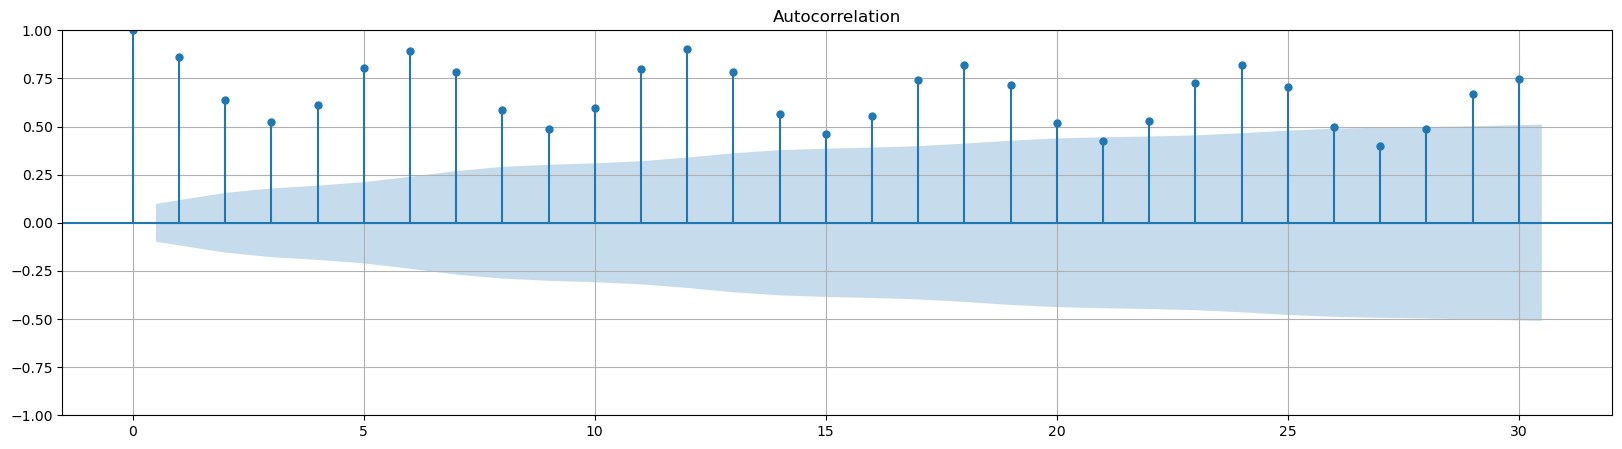

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(df['IPG2211A2N'], ax = plt.gca(), lags=30)
plt.show()

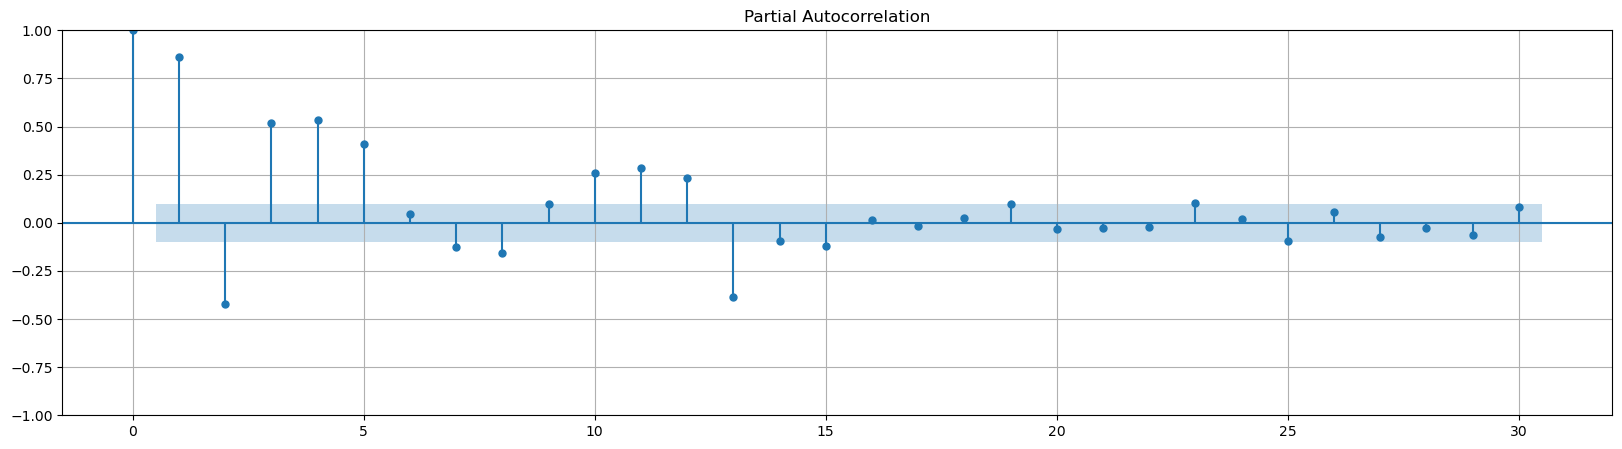

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plot_pacf(df['IPG2211A2N'], ax = plt.gca(), lags=30)
plt.show()

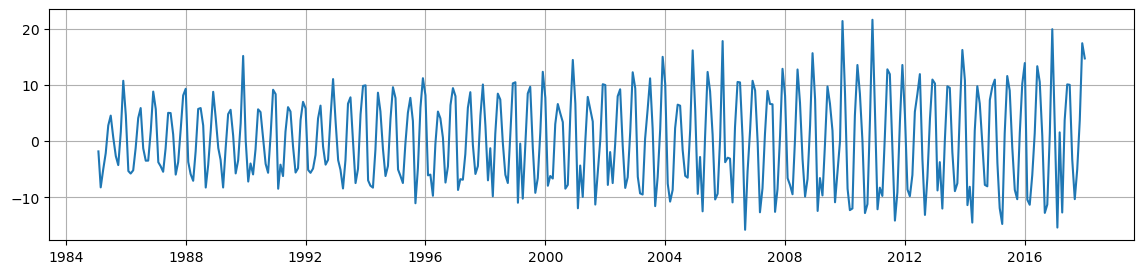

In [ ]:
# First Order Non Seasonal Differencing
diff = df['IPG2211A2N'].diff().dropna()      # Trying to make data Trend Stationary
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(diff)
plt.show()

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(diff)
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'P-value', '#Lags Used', 'Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -7.104891e+00
P-value                   4.077787e-10
#Lags Used                1.400000e+01
Number of Observations    3.810000e+02
Critical Value (1%)      -3.447631e+00
Critical Value (5%)      -2.869156e+00
Critical Value (10%)     -2.570827e+00
dtype: float64


In [ ]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kp = kpss(diff)
p = kp[1]

print("p-value for KPSS Test (untransformed) = ", p)

p-value for KPSS Test (untransformed) =  0.1


C:\Users\nmims.student\AppData\Local\Temp\ipykernel_8372\528972782.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kp = kpss(diff)


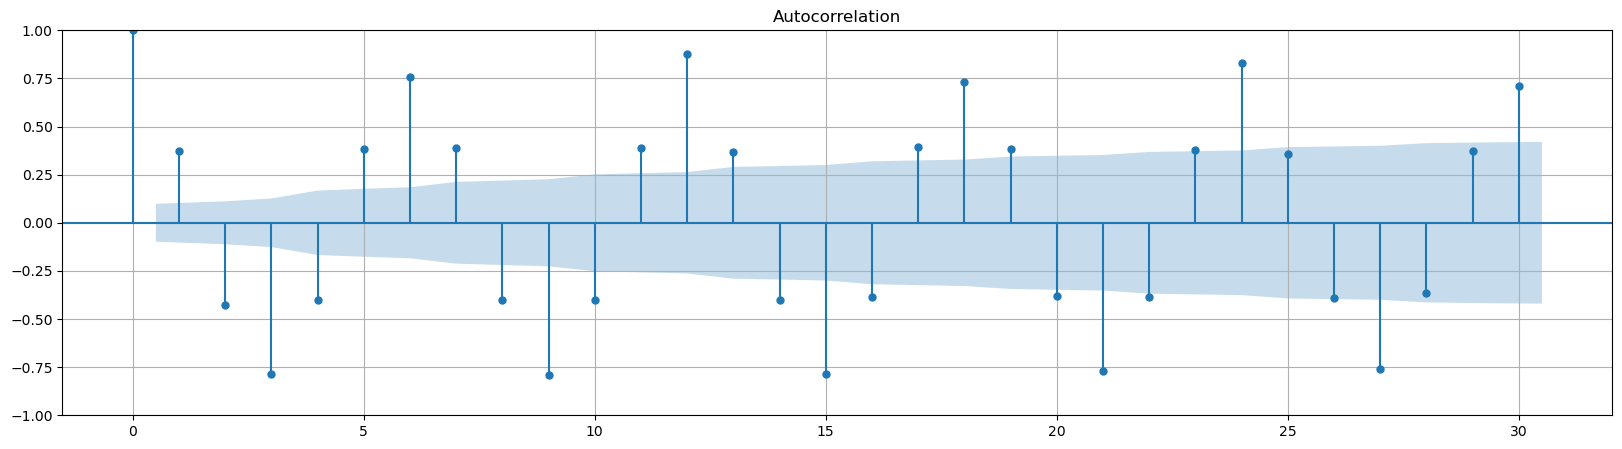

In [ ]:
# ACF Plot
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff, ax = plt.gca(), lags=30)
plt.show()

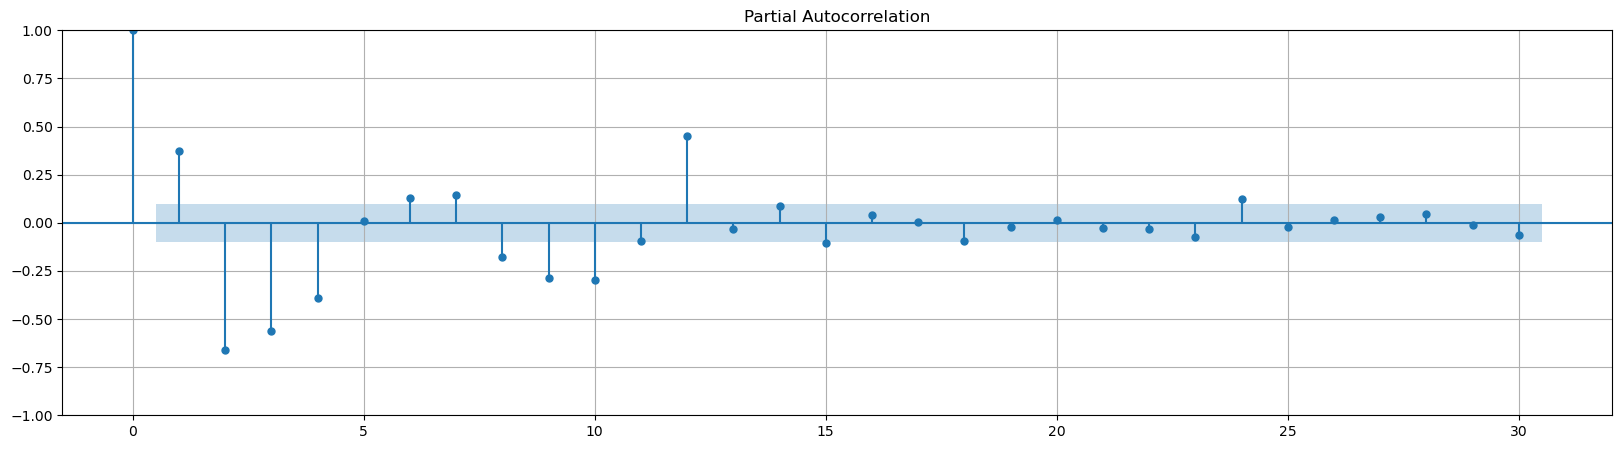

In [ ]:
# PACF Plot
plt.figure(figsize=(20,5))
plt.grid()
plot_pacf(diff, ax = plt.gca(), lags=30)
plt.show()

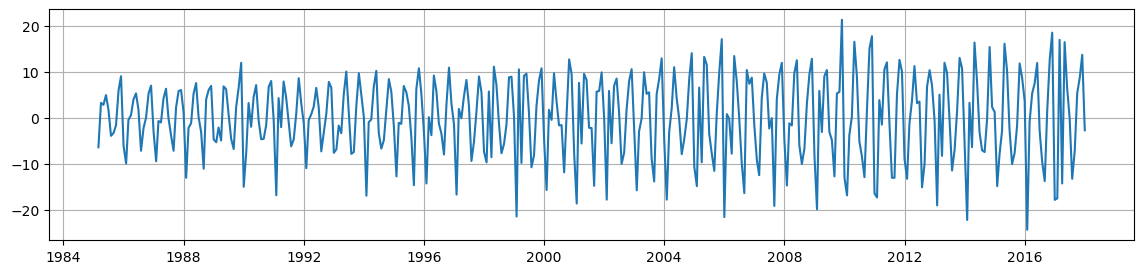

In [ ]:
# Second Order Non Seasonal Differencing
diff2 = df['IPG2211A2N'].diff().diff().dropna()      # Trying to make data Trend Stationary
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(diff2)
plt.show()

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(diff2)
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'P-value', '#Lags Used', 'Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -9.863042e+00
P-value                   4.183694e-17
#Lags Used                1.700000e+01
Number of Observations    3.770000e+02
Critical Value (1%)      -3.447815e+00
Critical Value (5%)      -2.869237e+00
Critical Value (10%)     -2.570870e+00
dtype: float64


In [ ]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kp = kpss(diff2)
p = kp[1]

print("p-value for KPSS Test (untransformed) = ", p)

p-value for KPSS Test (untransformed) =  0.1


C:\Users\nmims.student\AppData\Local\Temp\ipykernel_8372\1400720088.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kp = kpss(diff2)


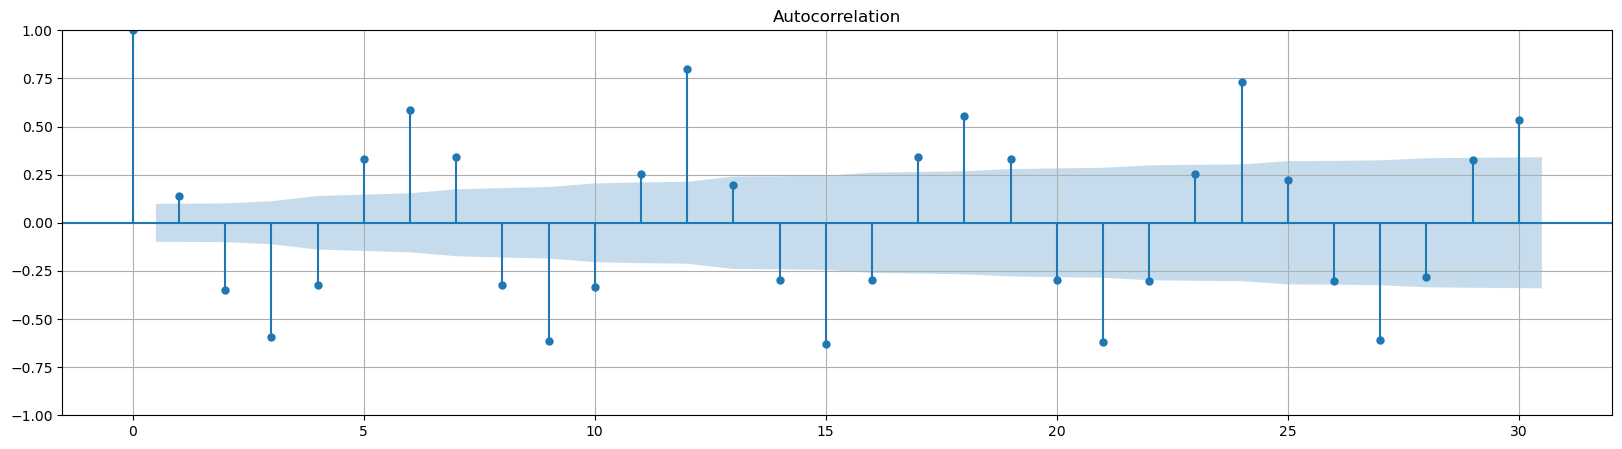

In [ ]:
# ACF Plot
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(diff2, ax = plt.gca(), lags=30)
plt.show()

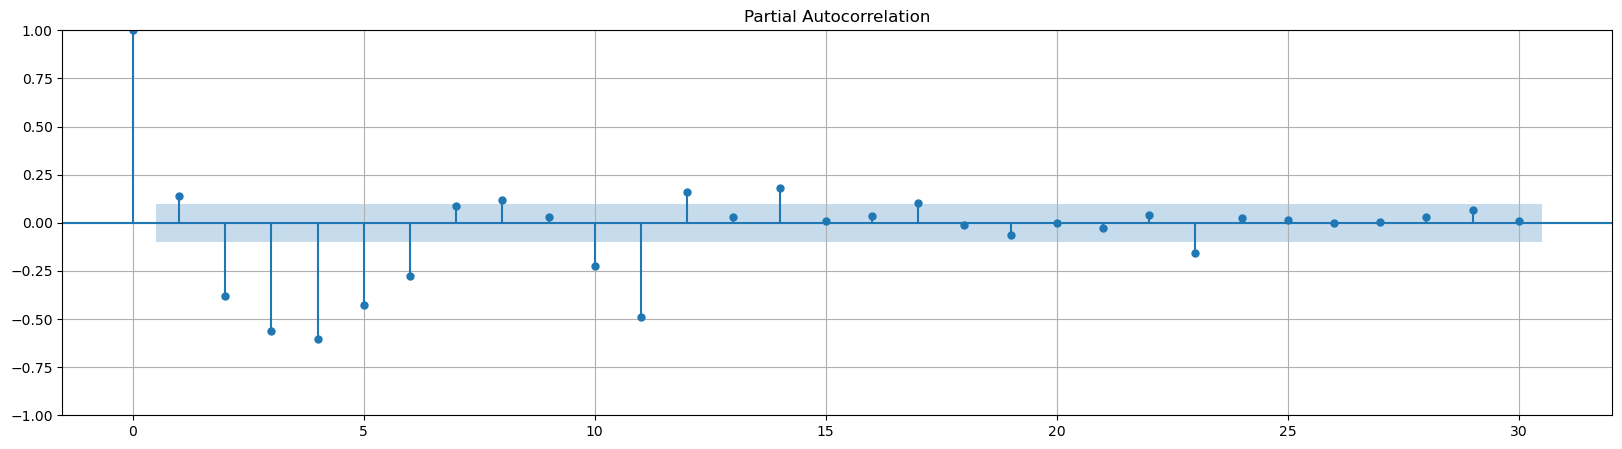

In [ ]:
# PACF Plot
plt.figure(figsize=(20,5))
plt.grid()
plot_pacf(diff2, ax = plt.gca(), lags=30)
plt.show()

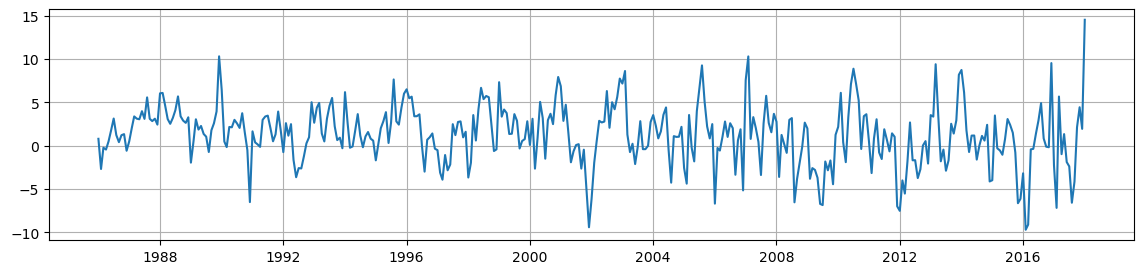

In [ ]:
# First Order Seasonal Differencing
sdiff = df['IPG2211A2N'].diff(periods=12).dropna()      # Trying to make data Trend Stationary
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(sdiff)
plt.show()

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(sdiff)
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'P-value', '#Lags Used', 'Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -5.673482e+00
P-value                   8.812645e-07
#Lags Used                1.200000e+01
Number of Observations    3.720000e+02
Critical Value (1%)      -3.448052e+00
Critical Value (5%)      -2.869341e+00
Critical Value (10%)     -2.570926e+00
dtype: float64


In [ ]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kp = kpss(sdiff)
p = kp[1]

print("p-value for KPSS Test (untransformed) = ", p)

p-value for KPSS Test (untransformed) =  0.024345634791440068


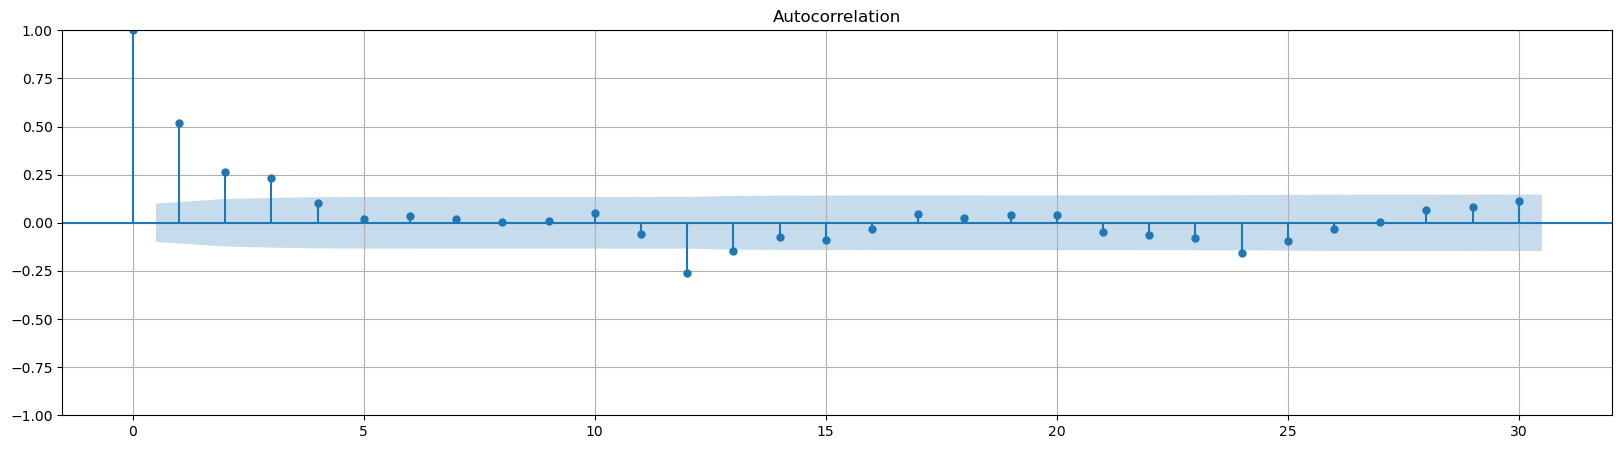

In [ ]:
# ACF Plot
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(sdiff, ax = plt.gca(), lags=30)
plt.show()

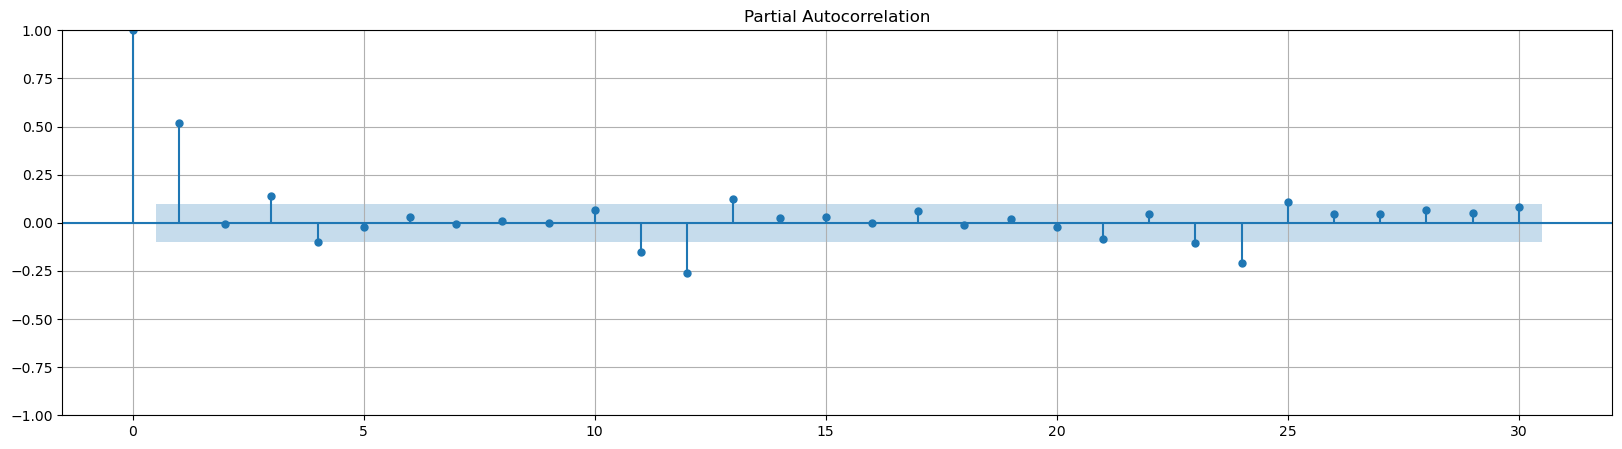

In [ ]:
# PACF Plot
plt.figure(figsize=(20,5))
plt.grid()
plot_pacf(sdiff, ax = plt.gca(), lags=30)
plt.show()

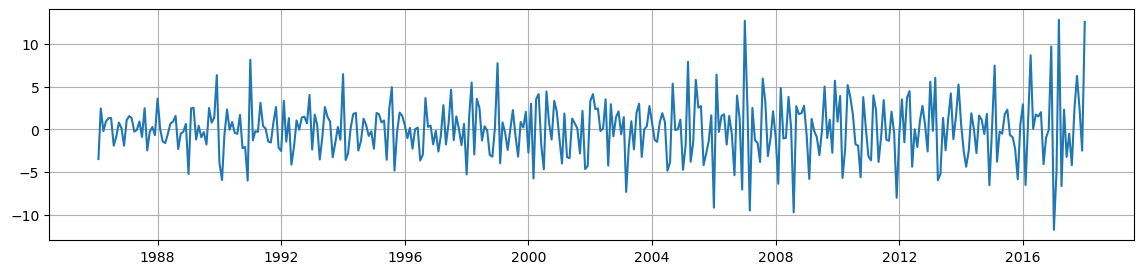

In [ ]:
# First Order Seasonal & Non-Seasonal Differencing
sdiff = df['IPG2211A2N'].diff(periods=12).dropna() # Seasonal Differencing
sddiff = sdiff.diff().dropna()                            # Non-Seasonal Differencing
plt.figure(figsize=(14,3))
plt.grid()
plt.plot(sddiff)
plt.show()

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
print("Result of Dickey Fuller Test")
dftest = adfuller(sddiff)
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'P-value', '#Lags Used', 'Number of Observations'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key]=value
print(dfoutput)

Result of Dickey Fuller Test
Test Statistic           -8.022039e+00
P-value                   2.063925e-12
#Lags Used                1.500000e+01
Number of Observations    3.680000e+02
Critical Value (1%)      -3.448245e+00
Critical Value (5%)      -2.869426e+00
Critical Value (10%)     -2.570971e+00
dtype: float64


In [ ]:
# KPSS Test
from statsmodels.tsa.stattools import kpss
kp = kpss(sddiff)
p = kp[1]

print("p-value for KPSS Test (untransformed) = ", p)

p-value for KPSS Test (untransformed) =  0.1


C:\Users\nmims.student\AppData\Local\Temp\ipykernel_8372\546374317.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kp = kpss(sddiff)


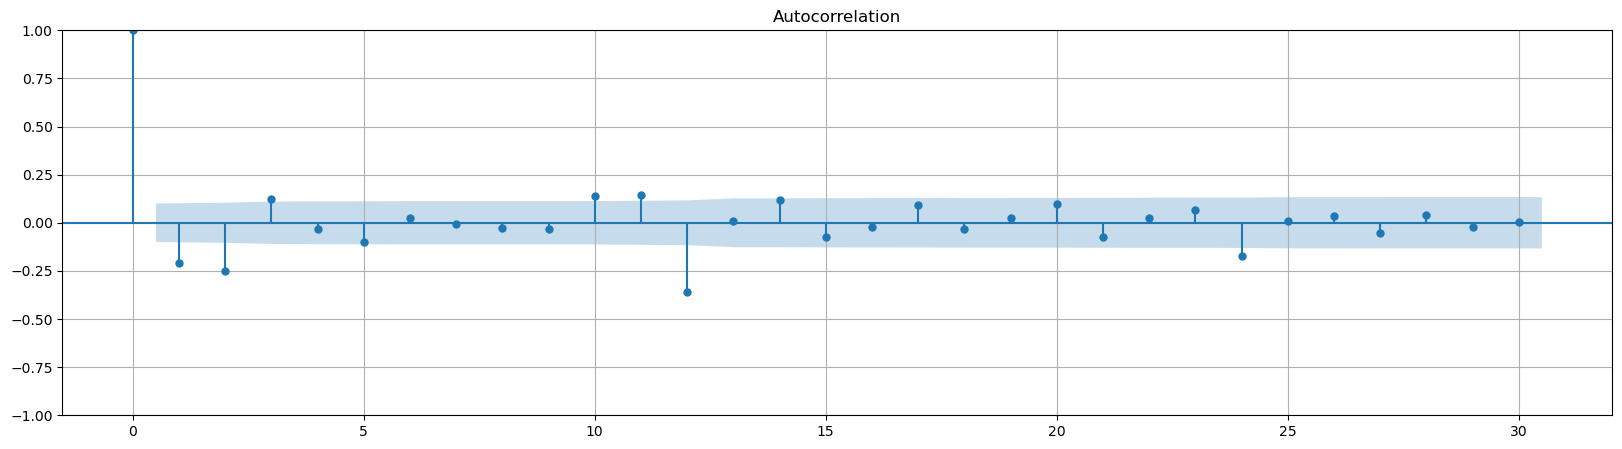

In [ ]:
# ACF Plot
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(20,5))
plt.grid()
plot_acf(sddiff, ax = plt.gca(), lags=30)
plt.show()

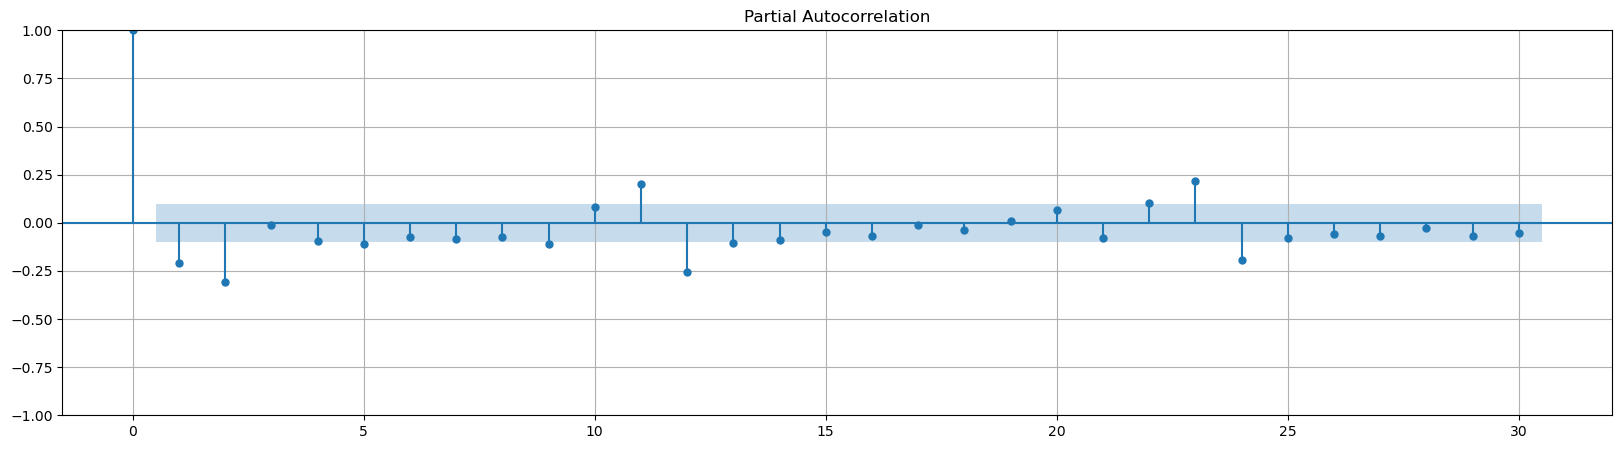

In [ ]:
# PACF Plot
plt.figure(figsize=(20,5))
plt.grid()
plot_pacf(sddiff, ax = plt.gca(), lags=30)
plt.show()

In [ ]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pip install pymannkendall pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import statsmodels.api as sm
model_1 = sm.tsa.statespace.SARIMAX(train_df['IPG2211A2N'], order = (1,1,1), seasonal_order = (1,1,1,12))
model_1_fit = model_1.fit()

print(model_1_fit.summary())

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         IPG2211A2N   No. Observations:                  277
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -575.211
Date:                            Mon, 03 Feb 2025   AIC                           1160.422
Time:                                    14:00:50   BIC                           1178.302
Sample:                                01-01-1985   HQIC                          1167.607
                                     - 01-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4861      0.056      8.618      0.000       0.376       0.597
ma.L1         -0.9810      0.019   

In [ ]:
from pmdarima.arima import auto_arima
model_auto_arima = auto_arima(df['IPG2211A2N'], seasonal = True, trace = True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1953.424, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2750.050, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2401.309, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2748.185, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1955.636, Time=2.02 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2105.437, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2016.179, Time=1.69 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.97 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1866.763, Time=1.12 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2265.6

In [ ]:
import statsmodels.api as sm
model_2 = sm.tsa.statespace.SARIMAX(train_df['IPG2211A2N'], order = (1,1,2), seasonal_order = (1,0,1,12))
model_2_fit = model_2.fit()

print(model_2_fit.summary())

NameError: name 'train_df' is not defined

In [ ]:
test_predictions1 = model_1_fit.forecast(len(test_df))
forecast_further1 = model_1_fit.forecast(len(test_df['IPG2211A2N'])+90)
forecast_further1 = forecast_further1[test_df.index.max():]
forecast_further1

2018-01-01    131.233972
2018-02-01    126.187633
2018-03-01    119.036998
2018-04-01    109.462493
2018-05-01    110.648377
                 ...    
2025-03-01    130.734526
2025-04-01    121.160021
2025-05-01    122.345905
2025-06-01    131.234333
2025-07-01    139.346525
Freq: MS, Name: predicted_mean, Length: 91, dtype: float64

In [ ]:
test_predictions2 = model_2_fit.forecast(len(test_df))
forecast_further2 = model_2_fit.forecast(len(test_df['IPG2211A2N'])+90)
forecast_further2 = forecast_further2[test_df.index.max():]
forecast_further2

2018-01-01    129.028578
2018-02-01    124.299441
2018-03-01    117.562077
2018-04-01    108.577938
2018-05-01    109.695474
                 ...    
2025-03-01    127.920577
2025-04-01    119.245520
2025-05-01    120.324609
2025-06-01    128.362982
2025-07-01    135.700235
Freq: MS, Name: predicted_mean, Length: 91, dtype: float64

In [ ]:
mape_test1 = mean_absolute_percentage_error(test_df['IPG2211A2N'], test_predictions1)
print('MAPE for TEST Data:', mape_test1)

MAPE for TEST Data: 0.09303131713801367


In [ ]:
mape_test2 = mean_absolute_percentage_error(test_df['IPG2211A2N'], test_predictions2)
print('MAPE for TEST Data:', mape_test2)

MAPE for TEST Data: 0.0862379804230265


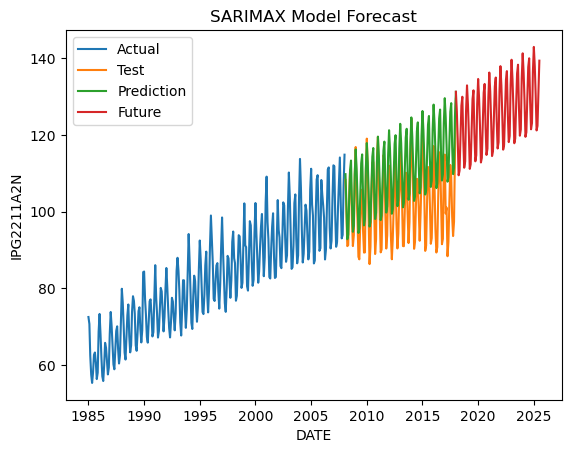

In [ ]:
plt.plot(train_df['IPG2211A2N'], label = 'Actual')
plt.plot(test_df['IPG2211A2N'], label = 'Test')
plt.plot(test_predictions1, label = 'Prediction')
plt.plot(forecast_further1, label = 'Future')

plt.title('SARIMAX Model Forecast')
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.legend()

plt.show()

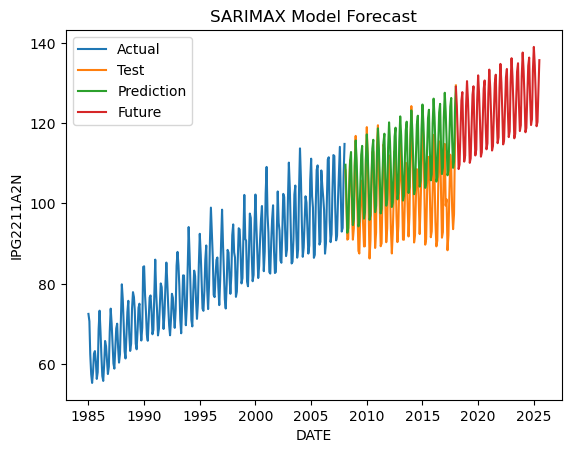

In [ ]:
plt.plot(train_df['IPG2211A2N'], label = 'Actual')
plt.plot(test_df['IPG2211A2N'], label = 'Test')
plt.plot(test_predictions2, label = 'Prediction')
plt.plot(forecast_further2, label = 'Future')

plt.title('SARIMAX Model Forecast')
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.legend()

plt.show()

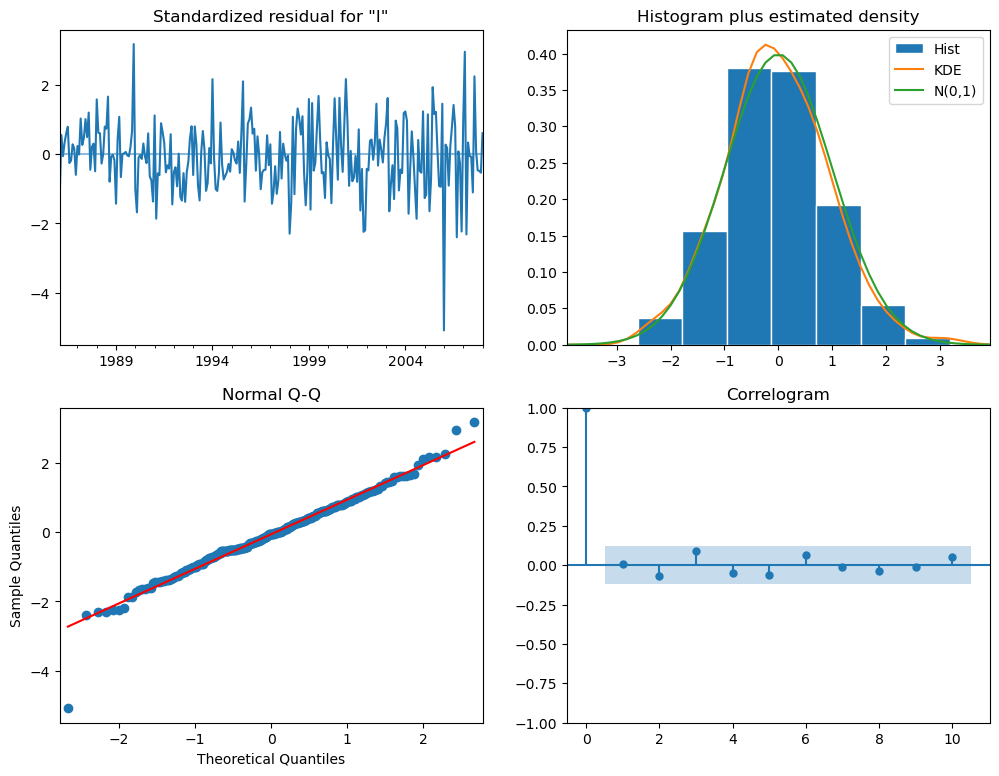

In [ ]:
model_1_fit.plot_diagnostics(figsize=(12,9))
plt.show()

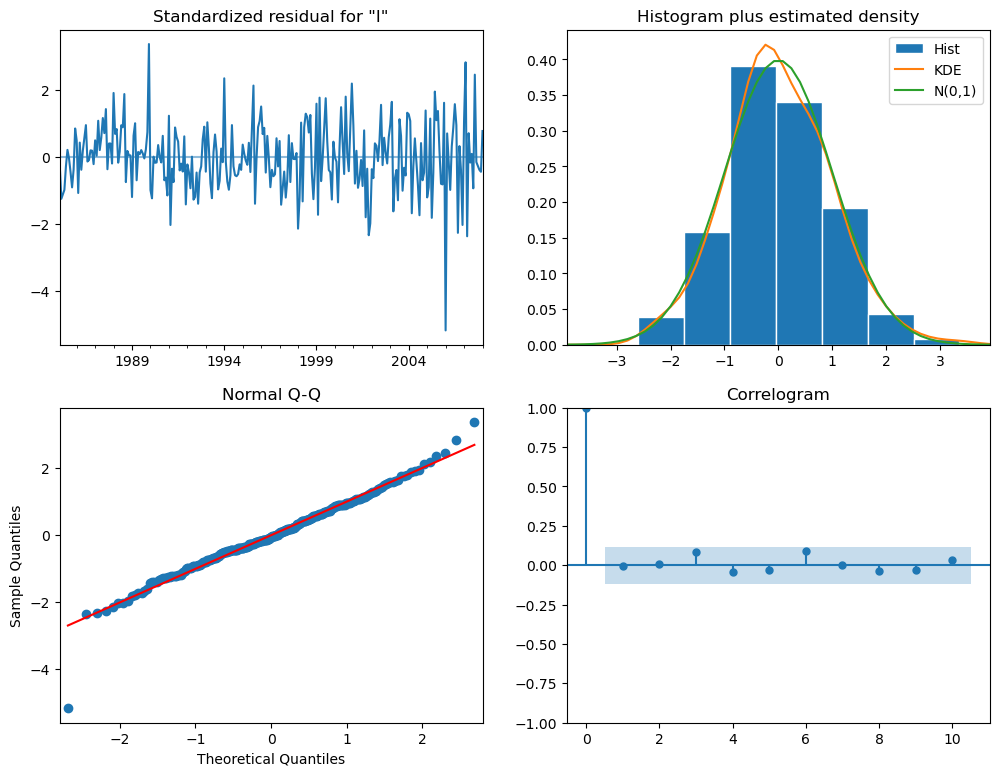

In [ ]:
model_2_fit.plot_diagnostics(figsize=(12,9))
plt.show()

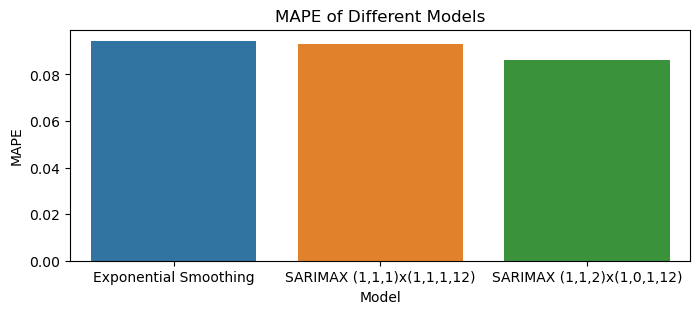

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create some data for the table
models = ['Exponential Smoothing', 'SARIMAX (1,1,1)x(1,1,1,12)','SARIMAX (1,1,2)x(1,0,1,12)']
mape_test = [0.09448179758628884, 0.09303131713801367, 0.0862379804230265]

table = pd.DataFrame({'Model':models, 'MAPE Test':mape_test})

plt.figure(figsize=(8,3))
sns.barplot(x='Model', y='MAPE Test', data=table)
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('MAPE of Different Models')
plt.show()